In [190]:
import os
import pandas as pd

In [191]:
article_path = "./stock_data/stock_article0301_0531/article/삼성전자/"
seed_path = "./stock_data/stock_article0301_0531/seed/삼성전자/"
min_price_path = "./stock_data/min_data/삼성전자_005930_.csv"

files = os.listdir(article_path)

In [192]:
news_data = pd.DataFrame()

for file in files:
    tmp_article = pd.read_csv(article_path+file).drop(['url'], axis=1)
    tmp_seed = pd.read_csv(seed_path+file)
    tmp = pd.concat([tmp_seed, tmp_article], axis=1)
    
    news_data = news_data.append(tmp, ignore_index=True)

In [193]:
min_price = pd.read_csv(min_price_path, index_col=0)
price_timestamps = pd.to_datetime(min_price["체결시간"].astype(str))

price_date = price_timestamps.apply(lambda x: x.date())
price_time = price_timestamps.apply(lambda x: x.time())

min_price['timestamps'] = price_timestamps

min_price['date'] = price_date
min_price['time'] = price_time

date_groups = min_price.groupby('date').groups

In [194]:
news_data['timestamps'] = pd.to_datetime(news_data['date'])
news_data = news_data.merge(min_price, on='timestamps', how="left")
news_data_with_price = news_data[news_data['현재가'].notnull()].copy()

In [195]:
end_price = news_data_with_price['date_y'].apply(lambda x: min_price.iloc[date_groups[x][0], :])['현재가']
news_data_with_price['end_price'] = end_price
news_data_with_price['label'] = news_data_with_price.apply(lambda x: x['end_price']/x['현재가']-1, axis=1)

In [196]:
news_data_with_price.text = news_data_with_price.text.astype(str)

In [197]:
word = "상승"

In [198]:
mask_yes = news_data_with_price.apply(lambda x: word in x['text'], axis=1)

In [199]:
mask_no = news_data_with_price.apply(lambda x: word not in x['text'], axis=1)

In [200]:
len(news_data_with_price[mask_yes]), len(news_data_with_price[mask_no])

(1758, 6035)

In [201]:
x['상승'].sum()

1758

In [276]:
def make_mask(w):
    mask_yes = news_data_with_price.apply(lambda x: w in x['text'], axis=1)   
    return pd.DataFrame(mask_yes, columns=[w]).astype(int)

In [277]:
word = ["상승", "하락", "코스피"]
x = pd.DataFrame()

for wrd in word:
    feature = make_mask(wrd)
    x = pd.concat([x, feature], axis=1)

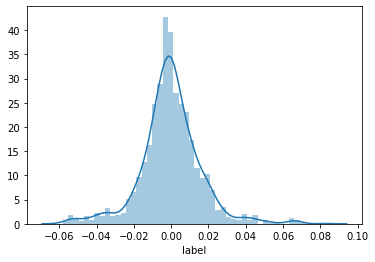

In [278]:
sns.distplot(y[x['하락'] == 1])

In [289]:
x

,상승,하락,코스피
141,0,0,0
142,0,0,0
143,1,0,1
144,1,0,1
145,1,1,1
...,...,...,...
17437,1,1,1
17438,1,0,1
17439,1,1,0
17440,1,1,0


In [205]:
y = news_data_with_price['label']

In [268]:
import pandas as pd
import numpy as np
  
n = 20  # Number of samples.
d = 3  # Dimensionality.
c = 2  # Number of categories.

data = np.random.randint(c, size=(n, d))
data = pd.DataFrame(data, columns=['CAT1', 'CAT2', 'CAT3'])
data # 20 X 3 dataset

,CAT1,CAT2,CAT3
0,0,0,1
1,1,0,0
2,0,1,1
3,0,1,1
4,0,0,1
5,1,1,0
6,0,0,0
7,1,0,1
8,0,1,0
9,0,1,1


In [283]:
# Contingency table.
contingency = pd.crosstab(data['CAT1'], data['CAT2'], normalize=True)

In [284]:
contingency

CAT2,0,1
CAT1,,
0,0.35,0.4
1,0.15,0.1


In [285]:
# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contingency)

In [287]:
import numpy as np
from scipy import stats

In [332]:
a=y[x['상승'].astype(bool)].to_numpy()
b=y.to_numpy()
c=y[x['하락'].astype(bool)].to_numpy()


In [334]:
t, p = stats.ttest_ind(a, b)
print("t = " + str(t))
print("p = " + str(p))

t = 4.449726452612521
p = 8.69539396973364e-06


In [336]:
a.mean(), a.std()

(3.1551829683610054e-05, 0.016230808427243556)

In [337]:
b.mean(), b.std()

(-0.0019653506385425216, 0.017162415349083197)

In [338]:
(a.mean() - b.mean())

0.0019969024682261315

In [335]:
t, p = stats.ttest_ind([1,2,3,4,5], [100,200,300,400,500])
print("t = " + str(t))
print("p = " + str(p))

t = -4.200004285283571
p = 0.002996496156011039


In [325]:
t, p = stats.ttest_ind([1,2,3,4,5], [1,2,3,4,5])
print("t = " + str(t))
print("p = " + str(p))

t = 0.0
p = 1.0


In [212]:
import numpy as np
from scipy.stats import chi2_contingency

obs = np.array([[4,16,20], [23, 18, 19]])
chi2_contingency(obs)
  
#(9.910060890453046, 0.00704786570249751, 2, 
# array([[10.8, 13.6, 15.6], [16.2, 20.4, 23.4]]))


(9.910060890453046,
 0.00704786570249751,
 2,
 array([[10.8, 13.6, 15.6],
        [16.2, 20.4, 23.4]]))

# Naive Beysian Model

In [379]:
from sklearn.model_selection import train_test_split

In [406]:
label_cat = pd.cut(news_data_with_price['label'],bins=[-np.inf , -0.005,0.005, np.inf],labels=['down','stay','up'])

In [407]:
X_train, X_test, y_train, y_test = train_test_split(news_data_with_price, label_cat, test_size=0.33, random_state=42)

In [408]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train['text'].to_numpy())

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [415]:
vectorized_train = vectorizer.transform(X_train['text'].to_numpy())

In [416]:
label_cat.value_counts()

stay    2835
down    2569
up      2389
Name: label, dtype: int64

In [417]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(vectorized, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [418]:
vectorized_test = vectorizer.transform(X_test['text'].to_numpy())

In [419]:
classifier.predict(vectorized_test)

array(['down', 'up', 'stay', ..., 'down', 'stay', 'stay'], dtype='<U4')

In [422]:
class_names=label_cat.unique()

In [427]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

Confusion matrix, without normalization
[[597 181  63]
 [205 584 142]
 [177 200 423]]
Normalized confusion matrix
[[0.7098692  0.21521998 0.07491082]
 [0.22019334 0.62728249 0.15252417]
 [0.22125    0.25       0.52875   ]]


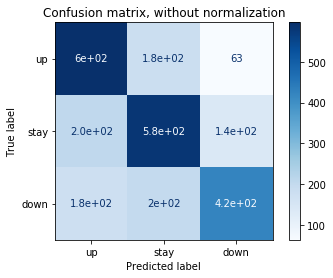

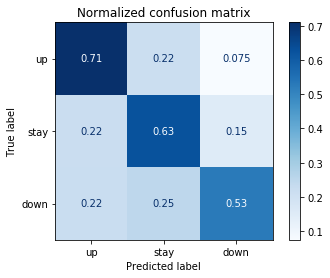

In [428]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, vectorized_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
